# Quantitative Susceptibilty Mapping (QSM): an inverse problem
Quantitative susceptibility maps can be obtained by inverting the following equation:
$$\delta B(\mathbf{r}) = D(\mathbf{r}) * \chi(\mathbf{r})$$
where $\delta B = \frac{\Delta B}{B_0} = - \frac{\phi(\mathbf{r})}{\gamma \mathrm{TE} B_0}$ is what we acquire with MRI and $ D(\mathbf{r}) = \mathcal{F^{-1}} \left( \frac{1}{3} - \frac{k_z}{k^2} \right) $ is the dipole kernel.

We can operate in the Fourier space and trasform the deconvolution into a division:
$$\chi(\mathbf{k}) = \frac{\delta B(\mathbf{k})}{D(\mathbf{k})}$$

In this simulation, we use a 3D Shepp-Logan phantom as the real susceptibility map. We generate $\delta B$ from it and then we try to go back to the original source.

## Ex. #01
Reconstruct the susceptibility map starting from the simulated $\delta B$

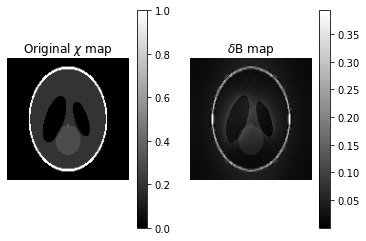

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from phantominator import shepp_logan
eps = np.finfo(np.float32).eps

# Load phantom
chi = shepp_logan((128, 128, 128))

# Create dipole kernel D(k)
ky, kx, kz = np.meshgrid(np.arange(-64,64),np.arange(-64,64),np.arange(-64,64))
k2 = kx**2 + ky**2 + kz**2
kernel = np.fft.ifftshift(1/3 - kz**2/(k2 + eps))

# Compute delta B generated by the susceptibilty distribution
delta_B = np.fft.ifftn(np.fft.fftn(chi) * kernel)

# View original chi map and delta B
plt.subplot(1,2,1)
plt.imshow(chi[:,:,45],cmap='gray')
plt.title('Original $\chi$ map')
plt.colorbar();
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.abs(delta_B[:,:,45]),cmap='gray')
plt.title('$\delta$B map')
plt.axis('off')
plt.colorbar();


In [ ]:
# Solution
# Reconstruct chi map
chi_recon = np.abs(np.fft.ifftn(np.fft.fftn(delta_B) / kernel))

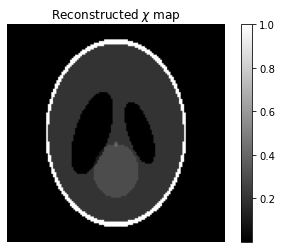

In [110]:
# View
plt.imshow(chi_recon[:,:,45],cmap='gray')
plt.title('Reconstructed $\chi$ map')
plt.colorbar();
plt.axis('off');

## Ex. #02: Add noise

Now add gaussian noise to the field map $\delta B$ to simulate a realistic acquired image and try to reconstruct the susceptibility map. What happens? Why?
The call to generate a 3D matrix of gaussian noise is:

`noise = sigma * np.random.randn(dim,dim,dim)`

In [ ]:
# Solution
# Create a matrix of gaussian noise with sigma 0.01
noise = 0.01 * np.random.randn(128,128,128)
# Add noise to simulated delta_B
delta_B_noise = delta_B + noise
# Reconstruct chi maps from noisy data
chi_recon_noise = np.abs(np.fft.ifftn(np.fft.fftn(delta_B_noise) / kernel))


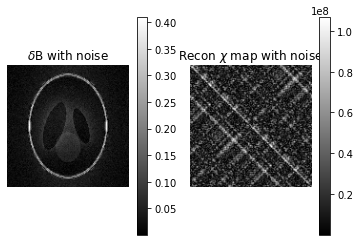

In [141]:
# View
plt.subplot(1,2,1)
plt.imshow(np.abs(delta_B_noise[:,:,45]),cmap='gray')
plt.title('$\delta$B with noise')
plt.colorbar();
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(chi_recon_noise[:,:,45],cmap='gray')
plt.title('Recon $\chi$ map with noise')
plt.colorbar();
plt.axis('off');

## Ex. #03: Thresholded K-space Division (TKD)
Division by kernel elements near to zero leads to noise amplification. The simpler approach to regularise this ill-conditioned problem is to threshold the kernel in k-space to avoid divisions by very small numbers. To this purpose, we a set a threshold $th$ and replace every kernel value smaller than $th$ with the threshold itself:
$$ if\ \ |D(\mathbf{k})|<th,\ \ D(\mathbf{k}) = th$$
Set a threshold and observe how this choice affect the values of the reconstructed $\chi$ map and the level of artifact.

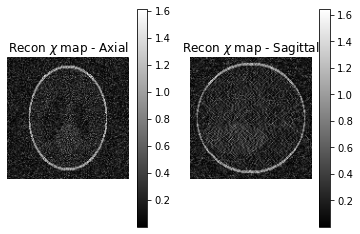

In [156]:
th = 0.01
kernel_thr = np.copy(kernel)
kernel_thr[np.abs(kernel_thr)<th] = th
chi_recon_tkd = np.abs(np.fft.ifftn(np.fft.fftn(delta_B_noise) / kernel_thr))

# View
plt.subplot(1,2,1)
plt.imshow(chi_recon_tkd[:,:,45],cmap='gray')
plt.title('Recon $\chi$ map - Axial')
plt.colorbar();
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(chi_recon_tkd[:,64,:],cmap='gray')
plt.title('Recon $\chi$ map - Sagittal')
plt.colorbar();
plt.axis('off');